In [2]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d
import csv

In [3]:
# Task A1
# compute numerical integration with trapezium rule
import numpy as np
import matplotlib.pyplot as pl

# function trapzeqd: compute numerical integration with trapezium rule with equidistant nodes
def trapzeqd(x,y):
    # get the interval h: distance between any two consecutives nodes
    h = x[1] - x[0]
    # get the number of intervals
    N = len(x) - 1  # obviously x and y must have same length
    
    # compute the integral
    
    # compute the sum for the intermediate points
    S = 0.0
    for n in range(1,N):
        S += y[n]  # add the current calue of y
    # add first and last points: see the formula for trapezoidal method
    I = h * (y[0]/2 + S + y[-1]/2 )
    
    # an alternative approach, with slicing and the function np.sum(), the integral can be computed within one line
    I = h * (y[0]/2 + np.sum(y[1:-1]) + y[-1]/2 )
    
    return I


# define the function f 
def f(x):
    y = 1/np.sqrt(x**17.10+2023)
    #y = 1/np.sqrt(x**1.10+2023)
    #y = np.sin(x)
    return y


# main
# lower boundary
a = 0
# upper boundary
b = 2
# number of equidistant nodes
N = 11

# generates the nodes
x = np.linspace(a,b,N) # remember, with linespace we have to provide the number of nodes and not intervals
print(x)
# compute points for f(x) at nodes x
y = f(x)

# compute the integral by invoking the function trapzeqd
I = trapzeqd(x,y)
print(I)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
0.03733405540428261


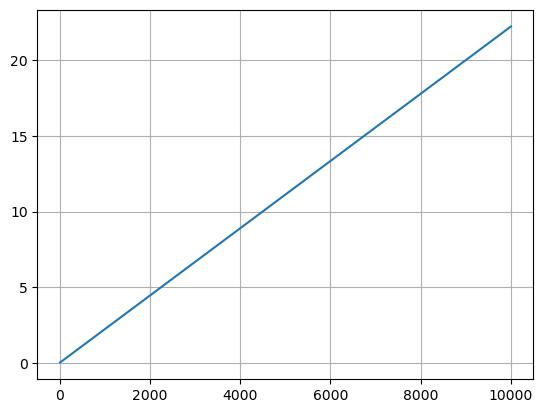

In [58]:
# Task A2
a = 0
b = [10,100,1000,10000]
N = 5
I = [] # generate an empty list where to store the results of I, for the various b
for up in b:
    # recompute the x interval
    x = np.linspace(a,up,N+1)
    # recompute y for these new nodes
    y = f(x)
    # compute the integral and append the resukt to the list I
    I += [trapzeqd(x,y)]

# plot I vs b
pl.plot(b,I)
pl.grid()
    

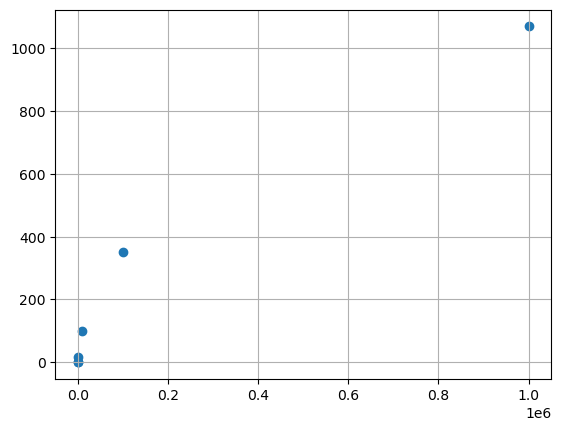

In [62]:
# Task A3
b = [10,100,1000,10000,100000,1000000]
dx = 0.5
I = [] # generate an empty list where to store the results of I, for the various b
for up in b:
    # recompute the x interval. This time we use arange as we know the interval rather than the number of intervals
    x = np.arange(a,up+dx,dx)
    # recompute y for these new nodes
    y = f(x)
    # compute the integral and append the resukt to the list I
    I += [trapzeqd(x,y)]

# plot I vs b
pl.scatter(b,I)
pl.grid()

In [ ]:
# Task B
# run the same codes for Tasks A2 and A3, but change f

# now the integral diverges as b --> infinity  (even when we use a small dx)

In [4]:
# Task C
# function trapz: compute numerical integration with trapezium rule, for nodes at any distance
def trapz(x,y):
    # get the number of subintervals
    N = len(x) - 1
    # compute the integral
    # set range for the trapezia: there are as many trapezia as the number of intervals
    R = range(0,N)
    S = 0
    for i in R:
        # compute the area of this single trapezium (remind yourself the area of a trapezium)
        S += 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
    return S

# test with one of the previous functions
I = trapz(x,y)
print(I)

0.03733405540428261


12.125701354602992


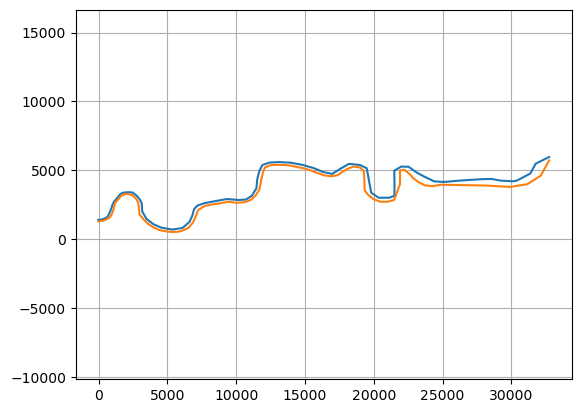

In [9]:
# Task D
import matplotlib.pyplot as pl
N = 72
xn = np.zeros(N)
yn = np.zeros(N)
xs = np.zeros(N)
ys = np.zeros(N)
# read in the coordinates of the banks
f = open('Thames.txt','r')
banks = csv.reader(f)
# extract coordinates of north and south banks
i = 0
for nodes in banks:
    xn[i] = float(nodes[0])
    yn[i] = float(nodes[1])
    xs[i] = float(nodes[2])
    ys[i] = float(nodes[3])
    i += 1
f.close()

# plot the two banks
pl.plot(xn,yn,xs,ys)
pl.grid()
pl.axis('equal')

# ompute the surface of the river, and convert in Km^2
Area = trapz(xn,yn) - trapz(xs,ys)
print(Area*1.0e-6)


In [64]:
# Task E
import numpy as np

a = 67 # major axis
b = 56 # minor axis
h = 25 # minor axis

# set the step intervals in x and y
dx = 0.5
dy = 0.5

# set the x range, not including the boundaries
x = np.arange(-a+dx,a,dx)
N = len(x)
# the y range depends of the various values of x, and cannot be fixed here

# integrate in dy, for all the value of x, i.e. find G(x)

G = np.zeros(N)
# for every x
for i in range(0,N):
    # determine the boundaries m and p for this x
    mx = np.sqrt(b**2*(1-x[i]**2/a**2))
    px = mx
    # set the y points for this x, not including the boundaries
    y = np.arange(-mx+dy,px,dy)
    z = np.zeros(len(y))
    # determine the values of the function z(x,y)
    for j in range(0,len(y)):
        z[j] = np.sqrt(h**2*(1-x[i]**2/a**2-y[j]**2/b**2)) 
    
    # integrate in dy from cx to dx (for this specific x)
    G[i] = trapz(y,z) # G(x)

# integrate G(x) in dx
I = trapz(x,G)

print(I)

# for an emisphere the volume is:
print((4/3*np.pi*a*b*h)/2)



196447.61402368188
196454.2606044817


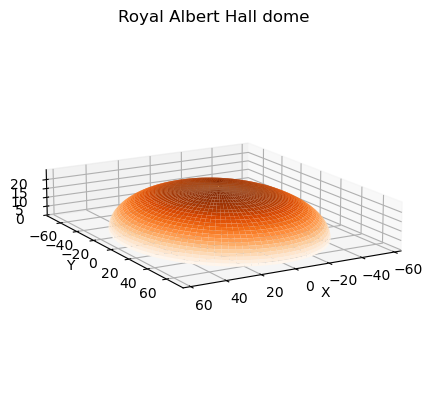

In [50]:
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d

# plot the dome

# set domain by using the two angles t and p
# Create a mesh grid
theta = np.linspace(-np.pi/2, np.pi/2, 50) 
phi = np.linspace(-np.pi/2, np.pi/2, 50)
Theta, Phi = np.meshgrid(theta, phi)

# Calculate the coordinates of points on the ellipsoid surface
X = a * np.sin(Theta) * np.cos(Phi)
Y = b * np.sin(Theta) * np.sin(Phi)
Z = h * np.cos(Theta)

# Create a 3D surface plot
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='Oranges')

# Set labels and title
ax.set_title('Royal Albert Hall dome')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.view_init(15, 60)


In [10]:
# Task E: compute the volume

# prepare arrays to receive data from input file
Nx = 100
Ny = 15
Xg = np.zeros((Ny,Nx))
Yg = np.zeros((Ny,Nx))
Zgb = np.zeros((Ny,Nx))
Zgt = np.zeros((Ny,Nx))
# read in the data
f = open('Aerofoil.txt','r')
nodes = csv.reader(f)
# organise data in grids of dimensions (Ny,Nx)
i = 0  # row
j = 0  # column
for row in nodes:
    Xg[i,j] = float(row[0])
    Yg[i,j] = float(row[1])
    Zgt[i,j] = float(row[2])
    Zgb[i,j] = float(row[3])
    j += 1
    if j == Nx:
        j = 0 
        i += 1
f.close()

# integrate in dx, for all the value of y, i.e. find G(y)
G = np.zeros(Ny)
for i in range(0,Ny):
    x = Xg[i,:] # define the set of x nodes
    zt = Zgt[i,:] # define the set of z values describing the top surface
    zb = Zgb[i,:] # define the set of z values describing the bottom surface
    # integrate in dx (top surface - bottom surface)
    G[i] = trapz(x,zt) - trapz(x,zb) # G(y)

# integrate G(y) in dy
y = Yg[:,0] # define the set of y nodes
I = trapz(y,G)

print(I)


0.6867489799269901


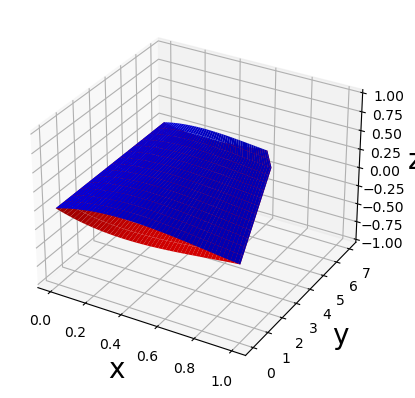

In [11]:
ax = pl.axes(projection='3d')
ax.plot_surface(Xg,Yg,Zgb,color='Red')
ax.plot_surface(Xg,Yg,Zgt,color='Blue')
ax.set_zlim3d(-1,1)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
pl.show()